# Project SPIKE: a study on spiking neural networks
Rodrigo Pereira Cruz <br>
pereirarodrigocs@gmail.com <br>
<br>
***

> This Jupyter notebook is used for studying spiking neural networks, more specifically the leaky integrate-and-fire model. It is focused on its applications in machine learning, reinforcement learning and its overall impact on computational intelligence. As stated in the readme file, this project will make heavy use of BindsNET for neural simulations.

## 1. Brief introduction to neuronal dynamics
***
Neurons can be divided into three different parts: dendrites, soma and axon. The dendrites, roughly speaking, act as the neuron's input receivers and relay this information directly to the neuron's body, the soma, which essentially acts as a processing unit: should the processed input exceed a certain threshold, then an output signal is generated and transmitted to the axon, which relays the output to other neurons. The junction between two neurons is known as the synapse - the terms presynaptic and postsynaptic originate from this definition, and are often used to designate a neuron that transmits information and a neuron that receives it, respectively.

<br>

<center>

![Neuron](https://neuronaldynamics.epfl.ch/online/x3.png)

<br>

<font size = "2"> **Fig. 1**: The overall structure of a neuron, with information being transmitted between them (represented by the arrows). Here, we have $j$ as the presynaptic neuron and $i$ as the postsynaptic one. Source: https://neuronaldynamics.epfl.ch/online/x3.png. </font>

<br>

</center>

<br>


Thus, in a neuronal system, neurons must be able to communicate with each other all the time. This communication, which is an electrical process, happens through action potentials, an event that is driven by a sum of changes in the membrane potential, which generate a spike when crossing a stimulation threshold.

<br>

<center>

![Neuron action potential](https://neuronaldynamics.epfl.ch/online/x9.png)

<br>

<font size = "2"> **Fig. 2**: Two sequential presynaptic neuron spikes, received as input in a postsynaptic neuron, cause two postsynaptic potentials that become a cumulative action potential. Note that the threshold $\vartheta$ is not reached, thus a spike is not produced. Source: https://neuronaldynamics.epfl.ch/online/x9.png. </font>

<br>

</center>

<br>

Consider a presynaptic neuron $j = 1$ and a postsynaptic neuron $i$. Neuron $j = 1$ fires spikes at $t_1^{(1)}, t_1^{(2)}, ...$. Each of those spikes evokes a postsynaptic potential $\epsilon_{i1}$, which is defined, mathematically, as

<br>

$$u_i(t) = \sum_j \epsilon_{i1}(t - t_1^{(j)}) + u_{rest}$$

<br>

where $u_{rest}$ corresponds to the neuron's at rest state value, which is $\approx \mbox{-65 } mV$.

<br>

Should there be more spikes, such that $j = 1, 2$ for example, the total change of the potential takes a cumulative linear form, such that

<br>

$$u_i(t) = \sum_j \sum_f \epsilon_{ij}(t - t_j^{(f)}) + u_{rest}$$

<br>

so long as there are only a few input spikes.


##2. Leaky integrate-and-fire model
***
Neuron models where action potentials are described as events are known as "integrate-and-fire" models. in those models, there are only 2 components that are relevant to their overall dynamics: an equation that describes the evolution of the membrane potential $u_i(t)$, and a mechanism for spike generation. 

In the case of the leaky integrate-and-fire model, we use a more specific version of the same 2 components specified previously: a linear differential equation to describe the evolution of the membrane potential, and a threshold for spike firing. The standard form of the linear differential equation is

<br>

$$\tau_m \frac{du}{dt} = - |u(t) - u_{rest}| +  \mbox{R } I(t)$$

<br>

where:

<br>

* $R$ = cell membrane's finite leak resistance (acts as a resistor); <br>
* $C$ = cell membrane capacity (acts as a capacitor); <br>
* $u$ = membrane potential; <br>
* $u_{rest}$ = neuron's at rest state value; <br>
* $|u(t) - u_{rest}|$ = momentary voltage; <br>
* $I(t)$ = positive input current; <br>
* $\tau_m$ = membrane time constant of the neuron, $R \times C$

<br>

> **Note**: the leaky integrate-and-fire neuron model can also be represented as
>
> <br>
>
> $$\tau \frac{dv(t)}{dt} = -(v_t - u_{rest}) \sum_{i = 1}^n W_i * Input_i$$
>
> <br>
>
> where $W_i$ = neuron weights, as it's easier to understand in a machine learning environment.

<br>

Suppose that, at time $t = 0$ the membrane takes a value $u_{rest} + \Delta u$ (with $\Delta u = u_{final} - u_{initial}$). For $t > 0$, the input $I(t)$ vanishes, so $I(t) = 0$. Given this result, it's expected that, if we wait long enough, the membrane potential will be restored to its $u_{rest}$ value, i.e. the neuron will be at rest. Indeed, the solution of the aforementioned linear differential equation with the initial condition $u(t_0) = u_{rest} + \Delta u$ is

<br>

$$u(t) - u_{rest} = \Delta \mbox{u } exp(- \frac{t - t_0}{\tau_m}), \mbox{ t} > 0$$

<br>

or

<br>

$$u(t) - u_{rest} = \Delta \mbox{u } exp(- \frac{\Delta t}{\tau_m}), \mbox{ t} > 0$$

<br>

The leaky integrate-and-fire model, in general, is known as a simplified version of neuronal systems. As such, many aspects of neuronal dynamics are ignored, which constitutes the main drawbacks of this type of model. Some of the major limitations of the leaky integrate-and-fire model are, thus far:

<br>

* **Inability to capture adaptation**: neurons are capable of adapting their spike-firing process based on the electrical current level, a trait that the leaky integrate-and-fire model lacks; <br>

* **Shape and amplitude are mostly static**: in neuronal systems, the shape and amplitude of a spike may be influenced by the state of the postsynaptic neuron. In the leaky integrate-and-fire model, however, this does not happen at any point; <br>

* **Simplified shape of action potentials**: the form of postsynaptic potentials also depends on the location of the synapse on the dendritic tree; the further away from the soma a synapse is, the smaller its postsynaptic response will be. In the leaky integrate-and-fire model, however, this trait is entirely neglected.


##3. Simulating a spiking neural network
***
Although it's entirely possible to create a spiking neural network by hand (as shown [here](https://github.com/Shikhargupta/Spiking-Neural-Network)), it is a very complicated process. Because of this, many SNN simulators have been created, most of which can be used as Python packages. As BindsNET is the chosen simulator for this notebook, we can use its modular, PyTorch-based nature to fully specify our spiking neural network in detail. The code below, which is adapted from the [BindsNET docs](https://bindsnet-docs.readthedocs.io/guide/guide_part_i.html), uses BindsNET to create a simple SNN and, then, inspect its neuronal activity:

###3.1. Installing and importing BindsNET

In [13]:
#!pip install git+https://github.com/BindsNET/bindsnet.git

from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes   # LIFNodes = leaky integrate-and-fire
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.analysis.plotting import plot_spikes, plot_voltages

###3.2. Importing other necessary packages

In [14]:
import torch
import matplotlib.pyplot as plt

###3.3. Creating our network

In [15]:
# Specifying the simulation time
time = 500 

# Creating the network and adding input/output layers
snn = Network()

source_layer = Input(n = 70)
target_layer = LIFNodes(n = 700)

snn.add_layer (
    layer = source_layer, name = "A"
)

snn.add_layer (
    layer = target_layer, name = "B"
)

###3.4. Adding connections

In [16]:
connection = Connection (
    source = source_layer,
    target = target_layer,
    w = 0.05 + 0.1 * torch.randn(source_layer.n, target_layer.n),  # normal (0.05, 0.01) weights.
)

# Adding a recurrent connection to the output layer
recurrent_connection = Connection (
    source = target_layer,
    target = target_layer,
    w = 0.035 * (torch.eye(target_layer.n) - 1),  # small, inhibitory weights.
)

snn.add_connection (
    connection = connection, source = "A", target = "B"
)

snn.add_connection (
    connection = recurrent_connection, source = "B", target = "B"
)

###3.5. Adding input/output monitors to analyse our neurons

In [17]:
# Input monitor
source_monitor = Monitor (
    obj = source_layer,
    state_vars = ("s", ),  # record spikes
    time = time
)

# Output monitor
target_monitor = Monitor (
    obj = target_layer,
    state_vars = ("s", "v"),  # record spikes and voltages
    time = time
)

snn.add_monitor(monitor = source_monitor, name = "A")
snn.add_monitor(monitor = target_monitor, name = "B")

###3.6. Creating input data

In [18]:
# Each spike is distributed according to Bernoulli (0.1)
input_data = torch.bernoulli(0.1 * torch.ones(time, source_layer.n)).byte()
inputs = {"A": input_data}

# Simulating the network with the created input data.
snn.run(inputs = inputs, time = time)

###3.7. Plotting our results

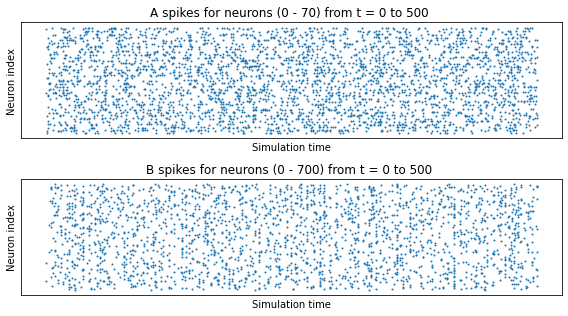

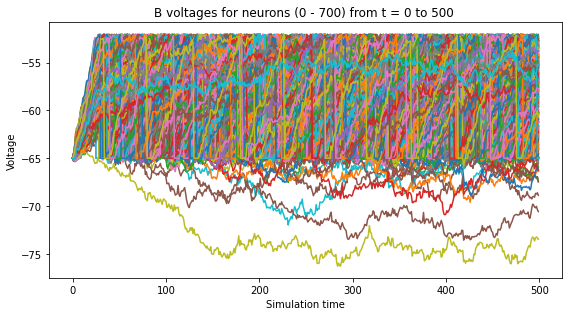

In [19]:
# Retrieving our spikes and voltages from the monitors
spikes = {
    "A": source_monitor.get("s"),
    "B": target_monitor.get("s")   
}

voltages = {"B": target_monitor.get("v")}

# Plotting the simulation
plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type = "line")
plt.show()

##4. Machine learning with SNNs
***
As they are fundamentally different from other types of artificial neural networks, spiking neural networks require a different approach when it comes to machine learning. Although both ANNs and SNNs adjust scalar-valued synaptic weight values in order to learn, the latter's architecture allows for a SNN-only type of bio-plausible learning technique to be used: spike-timing-dependent plasticity (STDP).

There are many variants of STDP that have been identified by neuroscientists, but they all follow the same pattern: the synaptic weight connecting presynaptic and postsynaptic neurons is adjusted according to their relative spike times within a interval of, roughly, tens of milliseconds in length. Notably, the information used for STDP weight adjustment is local to both the synapse and time.

Because of the different branches of machine learning (unsupervised, supervised and reinforcement learning), STDP must be carefully applied in each branch's learning mechanism. For this project, we'll focus on reinforcement learning with the aforementioned STDP as its learning rule.

##5. Introduction to reinforcement learning and deep Q-networks
***
Reinforcement learning (RL) algorithms train a policy, usually known as $\pi$, to maximize an agent's expected cumulative reward over time. This process is formally modeled as a Markov decision process (MDP), a concept which RL techniques are heavily reliant upon.

Given a state space $S$ and an action space $A$, the agent's initial position $s_0 \in S$ will be chosen from the possible starting spaces $S_0 \in S$. At each time step $t$, which starts from $t = 0$, the agent will take an action $a_t$ to transition from state $s_t$ to the next state $s_{t + 1}$. The probability of transitioning from state $s$ to the next state $s'$ by taking action $a$ is given by a transition function, which is formally defined as $P(s, a, s')$. Additionally, the reward function $R(s, a)$ defines the expected reward received by the agent after taking an action in its current state.

The policy $\pi$ is defined as the conditional distribution of actions given the state 

<br>

$$\pi (a, s) = Pr(A_t = a \mbox{ |} S_t = s)$$

<br>

The Q-value (also known as the action value) pair for a given policy, $q^\pi (s, a)$, is the expected return following the aforementioned policy $\pi$ after the agent takes an action in the current state. Formally, this is defined as 

<br>

$$q^\pi (s, a) = \mathbb{E}[\sum_{k = 0}^ \infty \gamma^k R_{t + k} \mbox{ |} S_t = s, A_t = a, \pi]$$

<br>

where $\gamma$ is the discount factor, which is the agent's overall interest in its rewards (0 = cares only for the first reward, 1 = cares for all future rewards). This action value function can also be represented as the following Bellman equation

<br>

$$q^\pi (s, a) = r_t + \gamma \max_{a_{t + 1}} q^\pi (s_{t + 1}, a_{t + 1})$$

<br>

There are many RN techniques used for approximating the Q-value and selecting a policy that maximizes it at each step to maximize returns. A deep Q-network is one of such algorithms, which uses a deep artificial neural network, more specifically a convolutional neural network, to approximate the Q-value. This neural network can learn policies from the pixels of the screen and the game score - it can, and often does, surpass human performance on many Atari games.

<br>

<center>

<br>

![Deep Q-network architecture](https://www.novatec-gmbh.de/wp-content/uploads/reinforcement_learning_loop-650x294.png)

<br>

<font size = "2"> **Fig. 2**: The steps taken in deep Q-learning, from processing the input data in the deep Q-network to taking an action in the agent's environment. Source: https://www.novatec-gmbh.de/wp-content/uploads/reinforcement_learning_loop-650x294.png. </font>

</center>

##6. Reinforcement learning with a STDP-based SNN
***
> **Note**: unlike traditional artificial neural networks, SNNs need to be simulated for a period of time to produce spikes and, thus, be able to process information. <br>

<br> 

In this section, we'll use one of OpenAI Gym's Procgen environments, ```coinrun```, to test the effectiveness and overall performance of a STDP-based spiking neural network. The architecture used in this SNN will be based on the one presented by [this paper](https://arxiv.org/pdf/1903.11012.pdf), which is that of a shallow (i.e. not many layers) spiking neural network with the following characteristics:

<br>

* An input of a 80x80 grayscale image obtained by preprocessing the frames of the game; <br>

* A hidden layer of 1000 neurons; <br>

* An output layer with 4 nodes, each of which corresponds to possible actions in the game.

###6.1. Importing all required packages

In [20]:
#!pip install procgen

from bindsnet.pipeline import EnvironmentPipeline
from bindsnet.encoding import bernoulli
from bindsnet.environment import GymEnvironment
from bindsnet.pipeline.action import select_multinomial

###6.2. Adding some PyTorch GPU options

In [22]:
device = None

if torch.cuda.is_available():
  device = torch.device("cuda")
  torch.set_default_tensor_type("torch.cuda.FloatTensor")

else:
  device = torch.device("cpu")

device(type='cpu')

###6.3. Building the SNN